# Dijkstra's Shortest Path Algorithm (1-to-n)
## Import Packages & Checks

In [3]:
import sys
import numpy as np
import math

In [4]:
print(sys.version)

3.6.12 |Anaconda, Inc.| (default, Sep  8 2020, 17:50:39) 
[GCC Clang 10.0.0 ]


## Define Classes

### Nodes

In [5]:
# Definition of the class myNode

class myNode:
    '''===============
    Single Node Class:
    ==================
    In the shortest path problem, a node is characterized by 
    - a (unique) ID
    - a state that denotes whether it is "open" or "closed"
    - a shortest path distance that needs to be overcome to get to that node
    - a predecessor node on that shortest path

    Upon initialization, the state, shortest path distance, and predecessor 
    node attributes are set to "open", infinity (or a very large number), and None.

    '''
    def __init__(self,
               node_ID):         # node ID

        self.node_ID = str(node_ID)
        self.state = 'open'
        self.SP_dist = math.inf
        self.predecessor = None

### Edges

In [6]:
# Definition of the class myEdge

class myEdge:
    '''===============
    Single Edge Class:
    ==================
    In the shortest path problem, an edge /arc is characterized by 
    - an origin node
    - a destination node
    - a weight
    This assumes the edge to be directed from the origin node to the destination node.    
    '''
    def __init__(self,
               from_node,       # origin node
               to_node,         # destination node
               weight):         # weights of the edges (distances)

        self.from_node = from_node
        self.to_node = to_node
        self.weight = weight

### Graph

In [7]:
# Definition of the class myGraph

class myGraph:
    '''=========
    Graph Class:
    ============
    In the shortest path problem, a graph is characterized by 
    - a set of nodes
    - a set of edges connecting the nodes
    This assumes a directed graph.    
    '''
    def __init__(self,
               nodes,           # nodes of the graph
               edges):          # edges between the nodes

        self.nodes = nodes
        self.edges = edges

## Define Functions

__Steps of the Dijkstra 1-to-n shortest path algorithm:__

For Step 2: Label update

In [8]:
def update_node_labels(graph,recent_node):
    '''===================
    Label Update Function:
    ======================

    Inputs:
    - graph : graph object : graph on which the shortest path problem is solved
    - recent_node : node object : the node on the graph that was most recently closed
    
    Outputs:
      None
    
    '''
    
    # check all nodes that 
    # i) can be reached from the recently closed node, and 
    # ii) are still 'open'
    for j in graph.nodes:
        if ((recent_node,j) in graph.edges) and (graph.nodes[j].state == 'open'):
            
            # 1. Compare their current distance label (i.e., the shortest distance to reach them found so far,
            #    captured in their 'SP_dist' attribute) with the distance of reaching them via the most 
            #    recently closed node.
            # 2. If the distance to reach them via the most recently closed node is shorter than the shortest
            #    path found so far, update their distance label (i.e., their 'SP_dist' attribute)
            graph.nodes[j].SP_dist = min(graph.nodes[j].SP_dist, 
                                         graph.nodes[recent_node].SP_dist + graph.edges[(recent_node,j)].weight)
            

For Steps 3-5: Close next node

In [9]:
def close_next_node(graph):
    '''======================
    Close Next Node Function:
    =========================

    Inputs:
    - graph : graph object : graph on which the shortest path problem is solved
    
    Outputs:
    - next node : node object : next node to close
    
    '''
    
    ### Initialize variables ###
    max_dist = math.inf     # smallest shortest path distance among all open nodes
    next_node = None        # next node to close
    
    
    ### Find next node to close, i.e., the 'open' node with smallest shortest path distance ###
    # 1. Iterate through all nodes
    for j in graph.nodes:
        # 2. If a node is still open AND has a shorter shorest path distance than any of 
        #    the other nodes explored so far, make this node the next node to close
        if (graph.nodes[j].state == 'open') and (graph.nodes[j].SP_dist <= max_dist):
            max_dist = graph.nodes[j].SP_dist
            next_node = j
    
    
    ### Find the nearest 'closed' node from which the next node to close is directly accessible ###
    # 1. Iterate through all nodes
    for j in graph.nodes:
        # 2. If the node is a direct predecessor of the next node to close on the shortest path to that node
        if graph.nodes[j].state == 'closed':
            if ((j,next_node) in graph.edges) and (graph.nodes[j].SP_dist == graph.nodes[next_node].SP_dist-graph.edges[(j,next_node)].weight):
                
                # 3. Close the node identified previously as the next node to close
                graph.nodes[next_node].state = 'closed'
                
                # 4. Set the current node as the predecessor on the shortest path to the node you just closed
                graph.nodes[next_node].predecessor = j
                
                # 5. Break ou of the for loop, since no further nodes need to be explored
                break
    
    # Print output
    print('Next node to close: '+ next_node + ' - predecessor: ' + graph.nodes[next_node].predecessor + ' - SP distance: '+ str(graph.nodes[next_node].SP_dist))
                
    return next_node

For Step 5: Check termination criterion

In [10]:
def still_open_nodes(graph):
    '''===========================
    Check for Open Nodes Function:
    ==============================

    Inputs:
    - graph : graph object : graph on which the shortest path problem is solved
    
    Outputs:
    - boolean : whether or not there are still nodes in the grah that have not been closed
    
    '''
    
    # Count the nodes that are already closed and compare with total number of nodes in the graph
    return sum([1 for i in graph.nodes if graph.nodes[i].state == 'closed']) < len(graph.nodes)

__Wrapper function for entire Dirjkstra algorithm__

Inputs:
- Graph to run the algorihm on
- starting node

Returns:
- shortest path distances from starting node to all other nodes
- corresponding shortest paths (node sequences)

In [11]:
def myDijkstra(graph,start_node: str):
    '''=========================
    Dijkstra Algorithm Function:
    ============================

    Inputs:
    - graph : graph object : graph on which the shortest path problem is solved
    - start_node : string : ID of the node that should be the source node of all 
      the shortest paths to be computed
    
    Outputs:
    - shortest_paths : list of list of strings : list of shortest paths to each node on the graph
      with each shortest path being a list of node IDs visited in sequence
    - SP_distances : list of shortest path lengths of all the shortest paths determined
    
    '''

    ### Step 1: Initialization ###
    # - set starting node to 'closed'
    graph.nodes[start_node].state = 'closed'
    # - set shortest path distance of the starting node to zero
    graph.nodes[start_node].SP_dist = 0
    # - register starting node as recently closed node
    recent_node = start_node
    
    # Prints to indicate start of the algorithm
    print('Starting node: '+start_node)
    print('Running Dijkstra algorithm:')
    
    
    ### Iterate through Steps 2 - 5 of the algorithm until there are no more "open" nodes ###
    while still_open_nodes(graph):
        # Step 2: Update the node labels after the most recent node was closed
        update_node_labels(graph,recent_node)
        # Steps 3 - 5: Determine the next node to close, close it, and determine its predecessor node
        recent_node = close_next_node(graph)
    
    
    ### Compile outputs of the algorithm ###
    # 1. Walk along the graph and create list of lists of nodes to represent the shortest paths found
    shortest_paths = dict([(i,[i]) for i in graph.nodes])
    for i in shortest_paths:
        # for every (end) node, walk back along its predecessor nodes until you reach the starting node
        current_path = shortest_paths[i]
        destination_node = current_path[len(current_path)-1]
        current_node = destination_node
        while current_node != start_node:
            predecessor_node = graph.nodes[current_node].predecessor
            shortest_paths[i].insert(0,predecessor_node)
            current_node = predecessor_node
    
    # 2. Record the distance label of the last node in every shortest path as the length of that path
    SP_distances = dict([(i,graph.nodes[i].SP_dist) for i in graph.nodes])
    
    
    ### Print and return outputs ###
    print('Shortest paths:')
    print(shortest_paths)
    print('Shortest path distances:')
    print(SP_distances)
            
    return shortest_paths, SP_distances


## Initialize Problem

Problem as discussed in class:
          
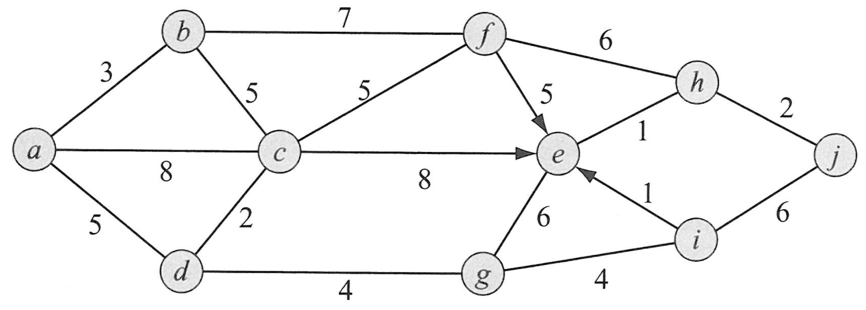

Initialize dictionary of nodes called 'a' through 'j'

In [12]:
# Here: we have 10 nodes labeled from 'a' to 'j'
node_data = [chr(i) for i in range(ord('a'), ord('j')+1)]
node_data

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [13]:
# Create a node object for each node
mynodes = dict([(i, myNode(i)) for i in node_data])
mynodes

{'a': <__main__.myNode at 0x7f9280482198>,
 'b': <__main__.myNode at 0x7f9280482828>,
 'c': <__main__.myNode at 0x7f9280482320>,
 'd': <__main__.myNode at 0x7f92804826d8>,
 'e': <__main__.myNode at 0x7f9280482208>,
 'f': <__main__.myNode at 0x7f92804828d0>,
 'g': <__main__.myNode at 0x7f9280482240>,
 'h': <__main__.myNode at 0x7f9280465c50>,
 'i': <__main__.myNode at 0x7f9280465b70>,
 'j': <__main__.myNode at 0x7f9280465be0>}

Initialize edges between nodes

In [14]:
# Here: we have a directed graph with edges as per the above figure
edge_data = [
    ('a', 'b', 3), 
    ('a', 'c', 8),
    ('a', 'd', 5),
    ('b', 'a', 3),
    ('b', 'c', 5),
    ('b', 'f', 7),
    ('c', 'a', 8),
    ('c', 'b', 5),
    ('c', 'd', 2),
    ('c', 'f', 5),
    ('c', 'e', 8),
    ('d', 'a', 5),
    ('d', 'c', 2),
    ('d', 'g', 4),
    ('e', 'g', 6),
    ('e', 'h', 1),
    ('f', 'b', 7),
    ('f', 'c', 5),
    ('f', 'e', 5),
    ('f', 'h', 6),
    ('g', 'd', 4),
    ('g', 'e', 6),
    ('g', 'i', 4),
    ('h', 'e', 1),
    ('h', 'f', 6),
    ('h', 'j', 2),
    ('i', 'g', 4),
    ('i', 'e', 1),
    ('i', 'j', 6),
    ('j', 'i', 6),
    ('j', 'h', 2)
]

# Create an edge object for every edge in the graph
myedges = dict([
    ((i[0],i[1]),myEdge(i[0],i[1],i[2])) for i in edge_data
])
myedges

{('a', 'b'): <__main__.myEdge at 0x7f928049e630>,
 ('a', 'c'): <__main__.myEdge at 0x7f928049e668>,
 ('a', 'd'): <__main__.myEdge at 0x7f928049e5c0>,
 ('b', 'a'): <__main__.myEdge at 0x7f928049e8d0>,
 ('b', 'c'): <__main__.myEdge at 0x7f928049e470>,
 ('b', 'f'): <__main__.myEdge at 0x7f928049e4e0>,
 ('c', 'a'): <__main__.myEdge at 0x7f928049e908>,
 ('c', 'b'): <__main__.myEdge at 0x7f928049e780>,
 ('c', 'd'): <__main__.myEdge at 0x7f9210437048>,
 ('c', 'f'): <__main__.myEdge at 0x7f9210437080>,
 ('c', 'e'): <__main__.myEdge at 0x7f92104370b8>,
 ('d', 'a'): <__main__.myEdge at 0x7f92104370f0>,
 ('d', 'c'): <__main__.myEdge at 0x7f9210437128>,
 ('d', 'g'): <__main__.myEdge at 0x7f9210437160>,
 ('e', 'g'): <__main__.myEdge at 0x7f9210437198>,
 ('e', 'h'): <__main__.myEdge at 0x7f92104371d0>,
 ('f', 'b'): <__main__.myEdge at 0x7f9210437208>,
 ('f', 'c'): <__main__.myEdge at 0x7f9210437240>,
 ('f', 'e'): <__main__.myEdge at 0x7f9210437278>,
 ('f', 'h'): <__main__.myEdge at 0x7f92104372b0>,


Initialize graph with these nodes and egdes

In [15]:
G = myGraph(mynodes,myedges)

In [16]:
G.nodes

{'a': <__main__.myNode at 0x7f9280482198>,
 'b': <__main__.myNode at 0x7f9280482828>,
 'c': <__main__.myNode at 0x7f9280482320>,
 'd': <__main__.myNode at 0x7f92804826d8>,
 'e': <__main__.myNode at 0x7f9280482208>,
 'f': <__main__.myNode at 0x7f92804828d0>,
 'g': <__main__.myNode at 0x7f9280482240>,
 'h': <__main__.myNode at 0x7f9280465c50>,
 'i': <__main__.myNode at 0x7f9280465b70>,
 'j': <__main__.myNode at 0x7f9280465be0>}

In [17]:
G.edges

{('a', 'b'): <__main__.myEdge at 0x7f928049e630>,
 ('a', 'c'): <__main__.myEdge at 0x7f928049e668>,
 ('a', 'd'): <__main__.myEdge at 0x7f928049e5c0>,
 ('b', 'a'): <__main__.myEdge at 0x7f928049e8d0>,
 ('b', 'c'): <__main__.myEdge at 0x7f928049e470>,
 ('b', 'f'): <__main__.myEdge at 0x7f928049e4e0>,
 ('c', 'a'): <__main__.myEdge at 0x7f928049e908>,
 ('c', 'b'): <__main__.myEdge at 0x7f928049e780>,
 ('c', 'd'): <__main__.myEdge at 0x7f9210437048>,
 ('c', 'f'): <__main__.myEdge at 0x7f9210437080>,
 ('c', 'e'): <__main__.myEdge at 0x7f92104370b8>,
 ('d', 'a'): <__main__.myEdge at 0x7f92104370f0>,
 ('d', 'c'): <__main__.myEdge at 0x7f9210437128>,
 ('d', 'g'): <__main__.myEdge at 0x7f9210437160>,
 ('e', 'g'): <__main__.myEdge at 0x7f9210437198>,
 ('e', 'h'): <__main__.myEdge at 0x7f92104371d0>,
 ('f', 'b'): <__main__.myEdge at 0x7f9210437208>,
 ('f', 'c'): <__main__.myEdge at 0x7f9210437240>,
 ('f', 'e'): <__main__.myEdge at 0x7f9210437278>,
 ('f', 'h'): <__main__.myEdge at 0x7f92104372b0>,


## Run Algorithm

In [18]:
myDijkstra(G,'a')

Starting node: a
Running Dijkstra algorithm:
Next node to close: b - predecessor: a - SP distance: 3
Next node to close: d - predecessor: a - SP distance: 5
Next node to close: c - predecessor: d - SP distance: 7
Next node to close: g - predecessor: d - SP distance: 9
Next node to close: f - predecessor: b - SP distance: 10
Next node to close: i - predecessor: g - SP distance: 13
Next node to close: e - predecessor: i - SP distance: 14
Next node to close: h - predecessor: e - SP distance: 15
Next node to close: j - predecessor: h - SP distance: 17
Shortest paths:
{'a': ['a'], 'b': ['a', 'b'], 'c': ['a', 'd', 'c'], 'd': ['a', 'd'], 'e': ['a', 'd', 'g', 'i', 'e'], 'f': ['a', 'b', 'f'], 'g': ['a', 'd', 'g'], 'h': ['a', 'd', 'g', 'i', 'e', 'h'], 'i': ['a', 'd', 'g', 'i'], 'j': ['a', 'd', 'g', 'i', 'e', 'h', 'j']}
Shortest path distances:
{'a': 0, 'b': 3, 'c': 7, 'd': 5, 'e': 14, 'f': 10, 'g': 9, 'h': 15, 'i': 13, 'j': 17}


({'a': ['a'],
  'b': ['a', 'b'],
  'c': ['a', 'd', 'c'],
  'd': ['a', 'd'],
  'e': ['a', 'd', 'g', 'i', 'e'],
  'f': ['a', 'b', 'f'],
  'g': ['a', 'd', 'g'],
  'h': ['a', 'd', 'g', 'i', 'e', 'h'],
  'i': ['a', 'd', 'g', 'i'],
  'j': ['a', 'd', 'g', 'i', 'e', 'h', 'j']},
 {'a': 0,
  'b': 3,
  'c': 7,
  'd': 5,
  'e': 14,
  'f': 10,
  'g': 9,
  'h': 15,
  'i': 13,
  'j': 17})

In line with solution found in class:

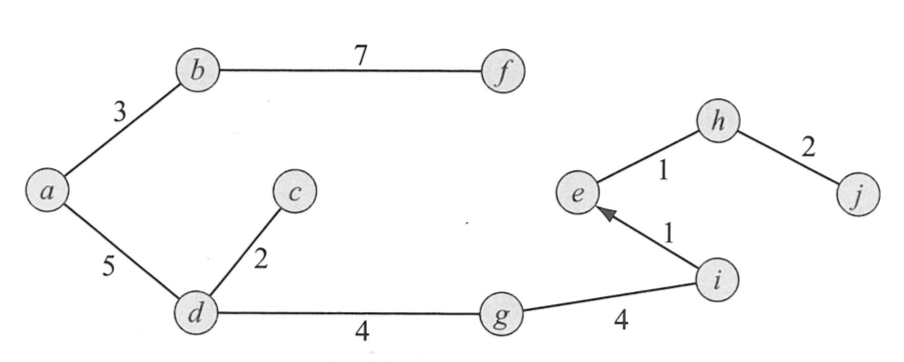